# Les Optimisations de type réseau

 Introduction.
Les optimisations de type réseaux ont cela en commun qu'elles mettent en jeu 
des noeuds (nodes) et des arrêtes valuées (arcs).

Dans cette étude, je vais tenter, une fois les optimisations classiques abordées,
d'étudier la possibilité d'y ajouter des paramêtres non linéaires dans un second temps.

Etude globale proposée par <b> Estelle Derrien - Github15000 </b>
 
# Sommaire

   - 1. Transports (Transportation problem)
         - Description
         - Modélisation mathématique
         - Un exemple avec Python Pulp
         - Un exemple avec NetworkX
         - Un exemple avec Cplex et une tâche dummy.
   - 2. Transports avec relais (Transshipment problem)
         - Description
         - Modélisation mathématique
         - Un exemple avec Python Pulp
         - Un exemple avec Cplex et une tâche dummy.
   - 3. Affectation (Assignment problem)
         - Description
         - Modélisation mathématique
         - Exemples avec les solveurs
   - 4. Optimisation de production à l'aide d'un modèle de type réseau.
         - Description
         - Modélisation mathématique
         - Exemples avec les solveurs
   - 5. Plus court chemin (Shortest path problem)
         - Description
         - Modélisation mathématique
         - Exemples avec les solveurs
   - 6. Problème de Flots (Flow)
         - Description Flots maximum et Flots minimum
         - Modélisation mathématique
         - Exemples avec les solveurs
   - 7. Optimisation financière à l'aide d'un modèle de type réseau.
         - Description
         - Modélisation mathématique
         - Exemples avec les solveurs

## Sources 

Les livres suivants : 
 
- Operations research de Hillier
- Operations Management de R Russel
- Optimizations modeling with spreadsheets de R. Baker
- https://developers.google.com/optimization/routing
- https://www.ibm.com/docs/en/icos/20.1.0?topic=cplex-python-examples



# Transports (Transportation problem)

Le Problème générique de base :
On a n usines qui produisent un seul objet, on a m magasins, le coût de transport est différent pour chaque routes, les usines fournissent un nombre d'objets maximum, les magasins ont un besoin de stock minimum.
Comment minimiser le côut global de transport ?

## Modélisation Maths

$$
\begin{matrix}
n & = & \text{Nombre d'usines} \\
m & = & \text{Nombre de magasins} \\
c_{ij} & = & \text{coût de transport de usine j à magasin i} \\
x_{ij} & = &\text{l'usine j est en liaison avec magasin i} \\

\end{matrix}
$$



$$
\begin{matrix}
\underset{x}{\text{min }} & \sum_{i = 1}^{n}\sum_{j = 1}^{m} c_{ij} x_{ij}  \\ 
& \\
\text{s.t. } & \sum_{j = 1}^{m} x_{ij} = 1 \\ 
\\

& x_{ij} \in \{ 0,1\} \\

\end{matrix}
$$

## Modélisation Math (2)

<img src="img/transport_mdl.png"></img>

# Un exemple avec Python Pulp

j'ai 2 usines A et B, leur capacité de production est 1000 et 4000, j'ai 5 magasins, qui ont une demande de 500,900,1800,200,700. Le côut de chaque route d'une usine vers un magasin est 

In [46]:
# Magasins      1  2  3  4  5
#               2, 4, 5, 2, 1  # A   Usines
#               3, 1, 3, 2, 3  # B

Quelles livraisons effectuer afin de minimiser le coût global de transport ?

In [47]:
import pulp as p

# Créer la liste de toutes les usines
Usines = ["A", "B"]

# Créer un dictionnaire de la capacité de chaque usine
capacite = {"A": 1000, "B": 4000}

# Créer la liste de chaque magasin
Magasins = ["1", "2", "3", "4", "5"]

# Créer un dictionnaire de la demande de chaque magasin
demand = {
"1": 500,
"2": 900,
"3": 1800,
"4": 200,
"5": 700,
}

# Créer la liste de coûts (matrice) de transports de chaque route d'une usine vers un magasins
# Ce sont les valuations des arcs
couts = [  
# Magasins   # 1  2  3  4  5
        [2, 4, 5, 2, 1],  # A   Usines
        [3, 1, 3, 2, 3],  # B
     ]
  
# On transforme les coûts en un dictionnaire - https://stackoverflow.com/questions/44527562/how-to-create-a-3-dimensional-dictionary-from-3-lists-in-python
couts = p.makeDict([Usines, Magasins], couts, 0)

# On veut minimiser le cout global de transport, on crée notre problème
prob = p.LpProblem("Distribution_Problem", p.LpMinimize)

# On crée une liste de tuples qui contiennent toutes les routes possibles.
# Creates a list of tuples containing all the possible routes for transport
Routes = [(w, b) for w in Usines for b in Magasins]

# A dictionary called 'Vars' is created to contain the referenced variables(the routes)
vars = p.LpVariable.dicts("Route", (Usines, Magasins), 0, None, p.LpInteger)

# On ajoute d'abord la fonction objectif.
prob += (p.lpSum([vars[w][b] * couts[w][b] for (w, b) in Routes]),"Somme_de_couts_de_transport",)

# The capacite maximum constraints are added to prob for each capacite node (usines)
for w in Usines:
    prob += (p.lpSum([vars[w][b] for b in Magasins]) <= capacite[w],"Somme_des_objets_sortis_de_usine%s" % w,)

# The demand minimum constraints are added to prob for each demand node (magasins)
for b in Magasins:
    prob += (
        p.lpSum([vars[w][b] for w in Usines]) >= demand[b],"Somme_des_objets_aux_magasins%s" % b,)


# On exécute le solveur
prob.solve()

# On affiche le statut de la solution
print ("Status:",p.LpStatus [prob.status])



# Afficher l'optimium de chaques variables items qui s'exprime en unité construites
for v in prob.variables ():
    print (v.name, "=", v.varValue)


# The optimised objective function value is printed to the screen
print ("objectiveResult", p.value (prob.objective))


    

Status: Optimal
Route_A_1 = 300.0
Route_A_2 = 0.0
Route_A_3 = 0.0
Route_A_4 = 0.0
Route_A_5 = 700.0
Route_B_1 = 200.0
Route_B_2 = 900.0
Route_B_3 = 1800.0
Route_B_4 = 200.0
Route_B_5 = 0.0
objectiveResult 8600.0


## Un exemple avec NetworkX

https://networkx.org/documentation/networkx-2.4/reference/algorithms/generated/networkx.algorithms.flow.min_cost_flow.html#networkx.algorithms.flow.min_cost_flow

https://or.stackexchange.com/questions/4386/fast-algorithm-for-transportation-problem-in-python

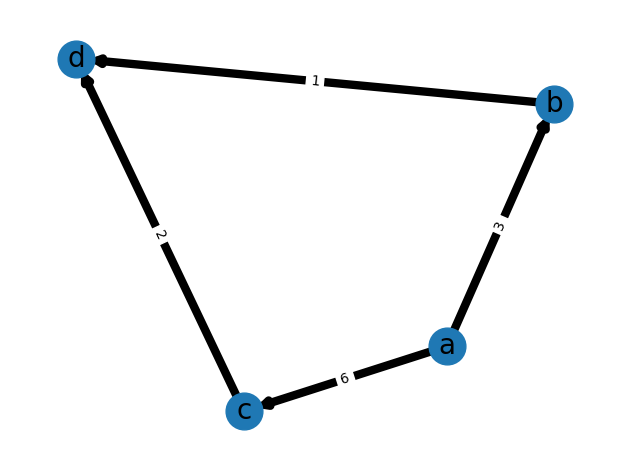

{'a': {'b': 4, 'c': 1}, 'd': {}, 'b': {'d': 4}, 'c': {'d': 1}}


In [48]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.DiGraph()
G.add_node('a', demand = -5)
G.add_node('d', demand = 5)
G.add_edge('a', 'b', weight = 3, capacity = 4)
G.add_edge('a', 'c', weight = 6, capacity = 10)
G.add_edge('b', 'd', weight = 1, capacity = 9)
G.add_edge('c', 'd', weight = 2, capacity = 5)

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.5]

pos = nx.spring_layout(G, seed=7)  # positions for all nodes - seed for reproducibility

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=6)
nx.draw_networkx_edges(
    G, pos, edgelist=esmall, width=6, alpha=0.5, edge_color="b", style="dashed"
)

# node labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
# edge weight labels
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()


flowDict = nx.min_cost_flow(G)

print(flowDict)